In [1]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [2]:
#allows to show the dataframes better
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:
data = pd.read_csv('cbb.csv')
#randomly shuffle data
data = data.sample(frac=1)
#data.head(20)

In [4]:
#create variable for unranked teams
rs = pd.isna(data['SEED'])
unranked = data[rs]
#create variable for ranked teams
rs = pd.notna(data['SEED'])
ranked = data[rs]
#reset indexes
unranked = unranked.reset_index(drop=True)
ranked = ranked.reset_index(drop=True)
#unranked.head(20)
#ranked.head(20)

In [5]:
pre = preprocessing.LabelEncoder()
data['CONF'] = pre.fit_transform(data['CONF'])
data['TEAM'] = pre.fit_transform(data['TEAM'])
data = data.drop(['POSTSEASON', 'SEED'], axis=1)

In [6]:
yr2015 = data[data['YEAR']==2015]
yr2016 = data[data['YEAR']==2016]
yr2017 = data[data['YEAR']==2017]
yr2018 = data[data['YEAR']==2018]
yr2019 = data[data['YEAR']==2019]
yr2020 = data[data['YEAR']==2020]

In [7]:
unranked = unranked.drop(['POSTSEASON','SEED'], axis= 1)
unranked['CONF'] = pre.fit_transform(unranked['CONF'])
unranked['TEAM'] = pre.fit_transform(unranked['TEAM'])
ranked = ranked.drop(['TEAM'], axis= 1)
ranked['CONF'] = pre.fit_transform(ranked['CONF'])
ranked['POSTSEASON'] = pre.fit_transform(ranked['POSTSEASON'])

In [8]:
results_dict = {}
def run_tests(dataset_name,dataset):

    X = dataset.drop(['W'], axis=1)
    y= dataset.W

    gnb = GaussianNB()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)  # 70% training and 30% test

    gnb.fit(X_train, y_train)

    y_pred = gnb.predict(X_test)
    
    nb_accuracy_score = accuracy_score(y_test, y_pred)

    print( dataset_name + " Naives Bayes Accuracy:", nb_accuracy_score)
    
    results_dict[dataset_name + " Naives Bayes Accuracy"] = nb_accuracy_score

    sn.heatmap(confusion_matrix(y_test, y_pred), annot=True)  # font size
    plt.xlabel('true label')
    plt.ylabel('predicted label');
    plt.show()

    #-----------------------------------------------------------------------------------

    # Random Forsest

    rfc_b = RFC()
    rfc_b.fit(X_train, y_train)
    y_pred = rfc_b.predict(X_train)
    rf_test_accuracy_score = accuracy_score(y_test, rfc_b.predict(X_test))
    print(dataset_name + ' Random Forest Train accuracy score:', accuracy_score(y_train, y_pred))
    print(dataset_name + ' Random Forest Test accuracy score:', rf_test_accuracy_score)
    results_dict[dataset_name + " Random Forest Accuracy"] = rf_test_accuracy_score

    #-----------------------------------------------------------------------------------


    # Ridge Regression

    ridge = Ridge()
    ridge.fit(X_train, y_train)
    y_prob = ridge.predict(X_train)
    y_pred = np.asarray([np.argmax(line) for line in y_prob])
    yp_test = ridge.predict(X_test)
    test_preds = np.asarray([np.argmax(line) for line in yp_test])
    ridge_test_accuracy_score = round(accuracy_score(y_test, test_preds),4)
    print(dataset_name + ' Ridge Regression Train accuracy score:', round(accuracy_score(y_train, y_pred),4))
    print(dataset_name + ' Ridge Regression Test accuracy score:', ridge_test_accuracy_score)
    results_dict[dataset_name + " Ridge Regression Accuracy"] = ridge_test_accuracy_score


    #-----------------------------------------------------------------------------------


    # K-Nearest Neighbors

    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    knn_test_accuracy_score = accuracy_score(y_test, knn.predict(X_test))
    print(dataset_name + ' K-NN Train accuracy score:', accuracy_score(y_train, y_pred))
    print(dataset_name + ' K-NN Test accuracy score:', accuracy_score(y_test, knn.predict(X_test)))
    results_dict[dataset_name + " KNN Accuracy"] = knn_test_accuracy_score

In [9]:
data_specific_cols = data[['W','WAB','BARTHAG','ADJOE','G','ADJDE','EFG_O','EFG_D','2P_O','2P_D']]
unranked_specific_cols = unranked[['W','WAB','BARTHAG','ADJOE','G','ADJDE','EFG_O','EFG_D','2P_O','2P_D']]
ranked_specific_cols = ranked[['W','WAB','BARTHAG','ADJOE','G','ADJDE','EFG_O','EFG_D','2P_O','2P_D']]
yr2015_specific_cols = yr2015[['W','WAB','BARTHAG','ADJOE','G','ADJDE','EFG_O','EFG_D','2P_O','2P_D']]
yr2016_specific_cols = yr2016[['W','WAB','BARTHAG','ADJOE','G','ADJDE','EFG_O','EFG_D','2P_O','2P_D']]
yr2017_specific_cols = yr2017[['W','WAB','BARTHAG','ADJOE','G','ADJDE','EFG_O','EFG_D','2P_O','2P_D']]
yr2018_specific_cols = yr2018[['W','WAB','BARTHAG','ADJOE','G','ADJDE','EFG_O','EFG_D','2P_O','2P_D']]
yr2019_specific_cols = yr2019[['W','WAB','BARTHAG','ADJOE','G','ADJDE','EFG_O','EFG_D','2P_O','2P_D']]
yr2020_specific_cols = yr2020[['W','WAB','BARTHAG','ADJOE','G','ADJDE','EFG_O','EFG_D','2P_O','2P_D']]

Unranked Naives Bayes Accuracy: 0.11693548387096774


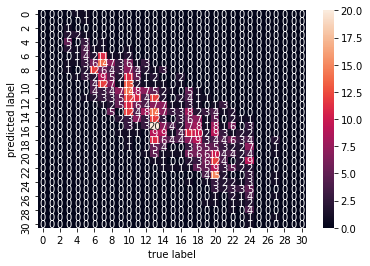

Unranked Random Forest Train accuracy score: 1.0
Unranked Random Forest Test accuracy score: 0.14415322580645162
Unranked Ridge Regression Train accuracy score: 0.0
Unranked Ridge Regression Test accuracy score: 0.002
Unranked K-NN Train accuracy score: 0.37176470588235294
Unranked K-NN Test accuracy score: 0.10786290322580645


In [10]:
run_tests('Unranked', unranked_specific_cols)

Full_Dataset Naives Bayes Accuracy: 0.11463414634146342


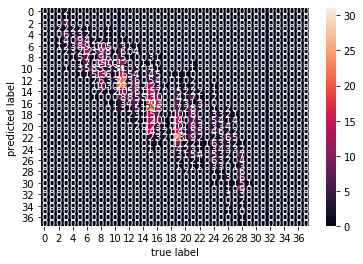

Full_Dataset Random Forest Train accuracy score: 1.0
Full_Dataset Random Forest Test accuracy score: 0.13739837398373983
Full_Dataset Ridge Regression Train accuracy score: 0.0
Full_Dataset Ridge Regression Test accuracy score: 0.0016
Full_Dataset K-NN Train accuracy score: 0.3681214421252372
Full_Dataset K-NN Test accuracy score: 0.11463414634146342


In [11]:
run_tests('Full_Dataset', data_specific_cols)

Ranked Naives Bayes Accuracy: 0.14285714285714285


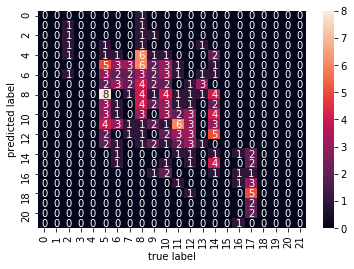

Ranked Random Forest Train accuracy score: 1.0
Ranked Random Forest Test accuracy score: 0.10504201680672269
Ranked Ridge Regression Train accuracy score: 0.0
Ranked Ridge Regression Test accuracy score: 0.0
Ranked K-NN Train accuracy score: 0.30392156862745096
Ranked K-NN Test accuracy score: 0.09663865546218488


In [12]:
run_tests('Ranked', ranked_specific_cols)

2015 Naives Bayes Accuracy: 0.12195121951219512


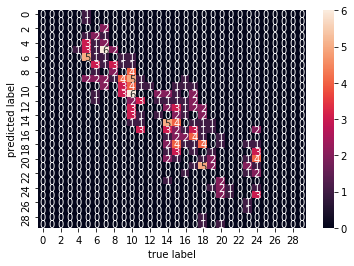

2015 Random Forest Train accuracy score: 1.0
2015 Random Forest Test accuracy score: 0.10569105691056911
2015 Ridge Regression Train accuracy score: 0.019
2015 Ridge Regression Test accuracy score: 0.0
2015 K-NN Train accuracy score: 0.23809523809523808
2015 K-NN Test accuracy score: 0.08130081300813008


In [13]:
run_tests('2015', yr2015_specific_cols)

2016 Naives Bayes Accuracy: 0.16666666666666666


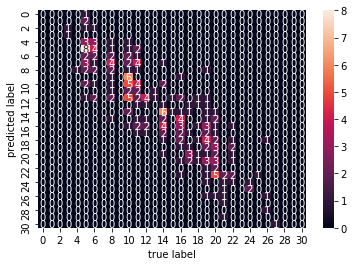

2016 Random Forest Train accuracy score: 1.0
2016 Random Forest Test accuracy score: 0.09349593495934959
2016 Ridge Regression Train accuracy score: 0.0
2016 Ridge Regression Test accuracy score: 0.0
2016 K-NN Train accuracy score: 0.3523809523809524
2016 K-NN Test accuracy score: 0.12195121951219512


In [14]:
run_tests('2016', yr2016_specific_cols)

2017 Naives Bayes Accuracy: 0.10975609756097561


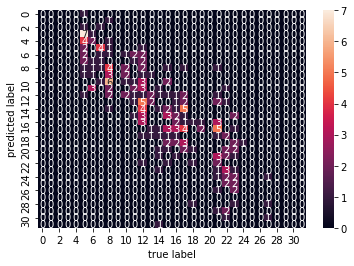

2017 Random Forest Train accuracy score: 1.0
2017 Random Forest Test accuracy score: 0.15040650406504066
2017 Ridge Regression Train accuracy score: 0.0
2017 Ridge Regression Test accuracy score: 0.0
2017 K-NN Train accuracy score: 0.3333333333333333
2017 K-NN Test accuracy score: 0.0975609756097561


In [15]:
run_tests('2017', yr2017_specific_cols)

2018 Naives Bayes Accuracy: 0.13008130081300814


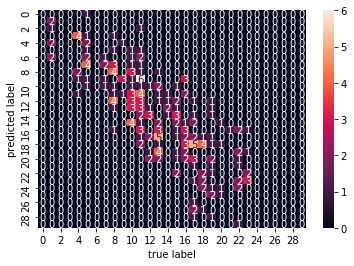

2018 Random Forest Train accuracy score: 1.0
2018 Random Forest Test accuracy score: 0.13414634146341464
2018 Ridge Regression Train accuracy score: 0.0
2018 Ridge Regression Test accuracy score: 0.0
2018 K-NN Train accuracy score: 0.3238095238095238
2018 K-NN Test accuracy score: 0.11382113821138211


In [16]:
run_tests('2018', yr2018_specific_cols)

2019 Naives Bayes Accuracy: 0.11693548387096774


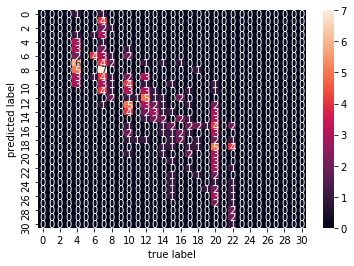

2019 Random Forest Train accuracy score: 1.0
2019 Random Forest Test accuracy score: 0.15725806451612903
2019 Ridge Regression Train accuracy score: 0.0
2019 Ridge Regression Test accuracy score: 0.0
2019 K-NN Train accuracy score: 0.3523809523809524
2019 K-NN Test accuracy score: 0.14919354838709678


In [17]:
run_tests('2019', yr2019_specific_cols)

In [18]:
results_dict

{'Unranked Naives Bayes Accuracy': 0.11693548387096774,
 'Unranked Random Forest Accuracy': 0.14415322580645162,
 'Unranked Ridge Regression Accuracy': 0.002,
 'Unranked KNN Accuracy': 0.10786290322580645,
 'Full_Dataset Naives Bayes Accuracy': 0.11463414634146342,
 'Full_Dataset Random Forest Accuracy': 0.13739837398373983,
 'Full_Dataset Ridge Regression Accuracy': 0.0016,
 'Full_Dataset KNN Accuracy': 0.11463414634146342,
 'Ranked Naives Bayes Accuracy': 0.14285714285714285,
 'Ranked Random Forest Accuracy': 0.10504201680672269,
 'Ranked Ridge Regression Accuracy': 0.0,
 'Ranked KNN Accuracy': 0.09663865546218488,
 '2015 Naives Bayes Accuracy': 0.12195121951219512,
 '2015 Random Forest Accuracy': 0.10569105691056911,
 '2015 Ridge Regression Accuracy': 0.0,
 '2015 KNN Accuracy': 0.08130081300813008,
 '2016 Naives Bayes Accuracy': 0.16666666666666666,
 '2016 Random Forest Accuracy': 0.09349593495934959,
 '2016 Ridge Regression Accuracy': 0.0,
 '2016 KNN Accuracy': 0.12195121951219512,

In [19]:
results_df = pd.DataFrame(list(results_dict.items()),columns = ['Model','Accuracy'])
#results_df = results_df.drop(results_df.index[[4,5,6,7]])
results_df[['Dataset','Model']] = results_df["Model"].str.split(" ", 1, expand=True)
results_df

,Model,Accuracy,Dataset
0,Naives Bayes Accuracy,0.116935,Unranked
1,Random Forest Accuracy,0.144153,Unranked
2,Ridge Regression Accuracy,0.002000,Unranked
3,KNN Accuracy,0.107863,Unranked
4,Naives Bayes Accuracy,0.114634,Full_Dataset
5,Random Forest Accuracy,0.137398,Full_Dataset
6,Ridge Regression Accuracy,0.001600,Full_Dataset
7,KNN Accuracy,0.114634,Full_Dataset
8,Naives Bayes Accuracy,0.142857,Ranked
9,Random Forest Accuracy,0.105042,Ranked


In [20]:
avg_per = results_df.groupby(['Model']).mean()
avg_per = avg_per.reset_index()
avg_per

,Model,Accuracy
0,KNN Accuracy,0.110370
1,Naives Bayes Accuracy,0.127477
2,Random Forest Accuracy,0.128449
3,Ridge Regression Accuracy,0.000450


In [21]:
results_df['Accuracy'].mean()

0.09168663936758811

In [22]:
columns = ['Full Dataset','Unranked','Ranked','2015','2016','2017','2018','2019']
model_names = avg_per['Model'].tolist()
avg_accuracy_per_model = avg_per['Accuracy'].tolist()
avg_accuracy_per_model

[0.11037042496975186, 0.1274771926866734, 0.12844893981392716, 0.00045]

In [24]:
data_table = pd.DataFrame(avg_per['Accuracy'].tolist(),columns = ['Average Accuracy per Model'])
data_table['Model'] = model_names
data_table = data_table.set_index('Model')
data_table['Full Dataset'] = results_df[results_df['Dataset']=='Full_Dataset'].sort_values(by=['Model'])['Accuracy'].tolist()
data_table['Unranked'] = results_df[results_df['Dataset']=='Unranked'].sort_values(by=['Model'])['Accuracy'].tolist()
data_table['Ranked'] = results_df[results_df['Dataset']=='Ranked'].sort_values(by=['Model'])['Accuracy'].tolist()
data_table['2015'] = results_df[results_df['Dataset']=='2015'].sort_values(by=['Model'])['Accuracy'].tolist()
data_table['2016'] = results_df[results_df['Dataset']=='2016'].sort_values(by=['Model'])['Accuracy'].tolist()
data_table['2017'] = results_df[results_df['Dataset']=='2016'].sort_values(by=['Model'])['Accuracy'].tolist()
data_table['2018'] = results_df[results_df['Dataset']=='2018'].sort_values(by=['Model'])['Accuracy'].tolist()
data_table['2019'] = results_df[results_df['Dataset']=='2019'].sort_values(by=['Model'])['Accuracy'].tolist()
avg_2019 = data_table['2019'].mean()
avg_2018 = data_table['2018'].mean()
avg_2017 = data_table['2017'].mean()
avg_2016 = data_table['2016'].mean()
avg_2015 = data_table['2015'].mean()
avg_unranked = data_table['Unranked'].mean()
avg_ranked = data_table['Ranked'].mean()
avg_full = data_table['Full Dataset'].mean()
avg_model = data_table['Average Accuracy per Model'].mean()
averages = [["Average Accuracy per Group",avg_model,avg_full,avg_unranked,avg_ranked,avg_2015,avg_2016,avg_2017,avg_2018,avg_2019]]
average_df = pd.DataFrame(averages, columns = ["Model",'Average Accuracy per Model','Full Dataset','Unranked','Ranked','2015','2016','2017','2018','2019'])
average_df = average_df.set_index('Model')
data_table = data_table.append(average_df,ignore_index=False)
data_table['2019'] = pd.Series(["{0:.1f}%".format(val * 100) for val in data_table['2019']], index = data_table.index)
data_table['2018'] = pd.Series(["{0:.1f}%".format(val * 100) for val in data_table['2018']], index = data_table.index)
data_table['2017'] = pd.Series(["{0:.1f}%".format(val * 100) for val in data_table['2017']], index = data_table.index)
data_table['2016'] = pd.Series(["{0:.1f}%".format(val * 100) for val in data_table['2016']], index = data_table.index)
data_table['2015'] = pd.Series(["{0:.1f}%".format(val * 100) for val in data_table['2015']], index = data_table.index)
data_table['Ranked'] = pd.Series(["{0:.1f}%".format(val * 100) for val in data_table['Ranked']], index = data_table.index)
data_table['Unranked'] = pd.Series(["{0:.1f}%".format(val * 100) for val in data_table['Unranked']], index = data_table.index)
data_table['Full Dataset'] = pd.Series(["{0:.1f}%".format(val * 100) for val in data_table['Full Dataset']], index = data_table.index)
data_table['Average Accuracy per Model'] = pd.Series(["{0:.1f}%".format(val * 100) for val in data_table['Average Accuracy per Model']], index = data_table.index)
data_table = data_table[['Full Dataset','Unranked','Ranked','2015','2016','2017','2018','2019','Average Accuracy per Model']]
data_table

,Full Dataset,Unranked,Ranked,2015,2016,2017,2018,2019,Average Accuracy per Model
Model,,,,,,,,,
KNN Accuracy,11.5%,10.8%,9.7%,8.1%,12.2%,12.2%,11.4%,14.9%,11.0%
Naives Bayes Accuracy,11.5%,11.7%,14.3%,12.2%,16.7%,16.7%,13.0%,11.7%,12.7%
Random Forest Accuracy,13.7%,14.4%,10.5%,10.6%,9.3%,9.3%,13.4%,15.7%,12.8%
Ridge Regression Accuracy,0.2%,0.2%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%
Average Accuracy per Group,9.2%,9.3%,8.6%,7.7%,9.6%,9.6%,9.5%,10.6%,9.2%
